# Data Loading & Cleaning

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

We will begin by importing our libraries needed for exploratory data analysis (EDA) and loading our CSV file containing patient vital information. Next, we will remove the id and bp_category_encoded columns as they are not necessary. It will also help to check for any missing/null values.

In [3]:
df = pd.read_csv('cardio_data.csv')

In [4]:
df = df.drop(['id', 'bp_category_encoded'], axis=1)

In [5]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,Hypertension Stage 1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,Hypertension Stage 2
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,Normal


In [6]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi
count,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000
mean,19462.667737,1.348625,164.372861,74.100688,126.434924,81.263925,1.363243,1.225174,0.087662,0.053134,0.803548,0.493688,52.823635,27.510513
std,2468.381854,0.476539,8.176756,14.288862,15.961685,9.143985,0.678080,0.571288,0.282805,0.224302,0.397317,0.499964,6.769909,6.026497
min,10798.000000,1.000000,55.000000,11.000000,90.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,29.000000,3.471784
25%,17656.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000,23.875115
50%,19700.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,53.000000,26.346494
75%,21323.000000,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000,30.116213
max,23713.000000,2.000000,250.000000,200.000000,180.000000,120.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,64.000000,298.666667


In [7]:
df.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
age_years      0
bmi            0
bp_category    0
dtype: int64

In [8]:
df['cardio'].value_counts()

cardio
0    34533
1    33672
Name: count, dtype: int64

# Outlier Detection and Filtering

Before we continue, it would be best to check for outliers. For example, the bmi variable has a maximum value of 298.67, which indicates that there are possible extreme data points or data entry errors present in the dataset. We can visualize all of our numerical features using boxplots, and identify and remove extreme values that fall out of normal ranges.

In [9]:
df.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio', 'age_years', 'bmi',
       'bp_category'],
      dtype='object')

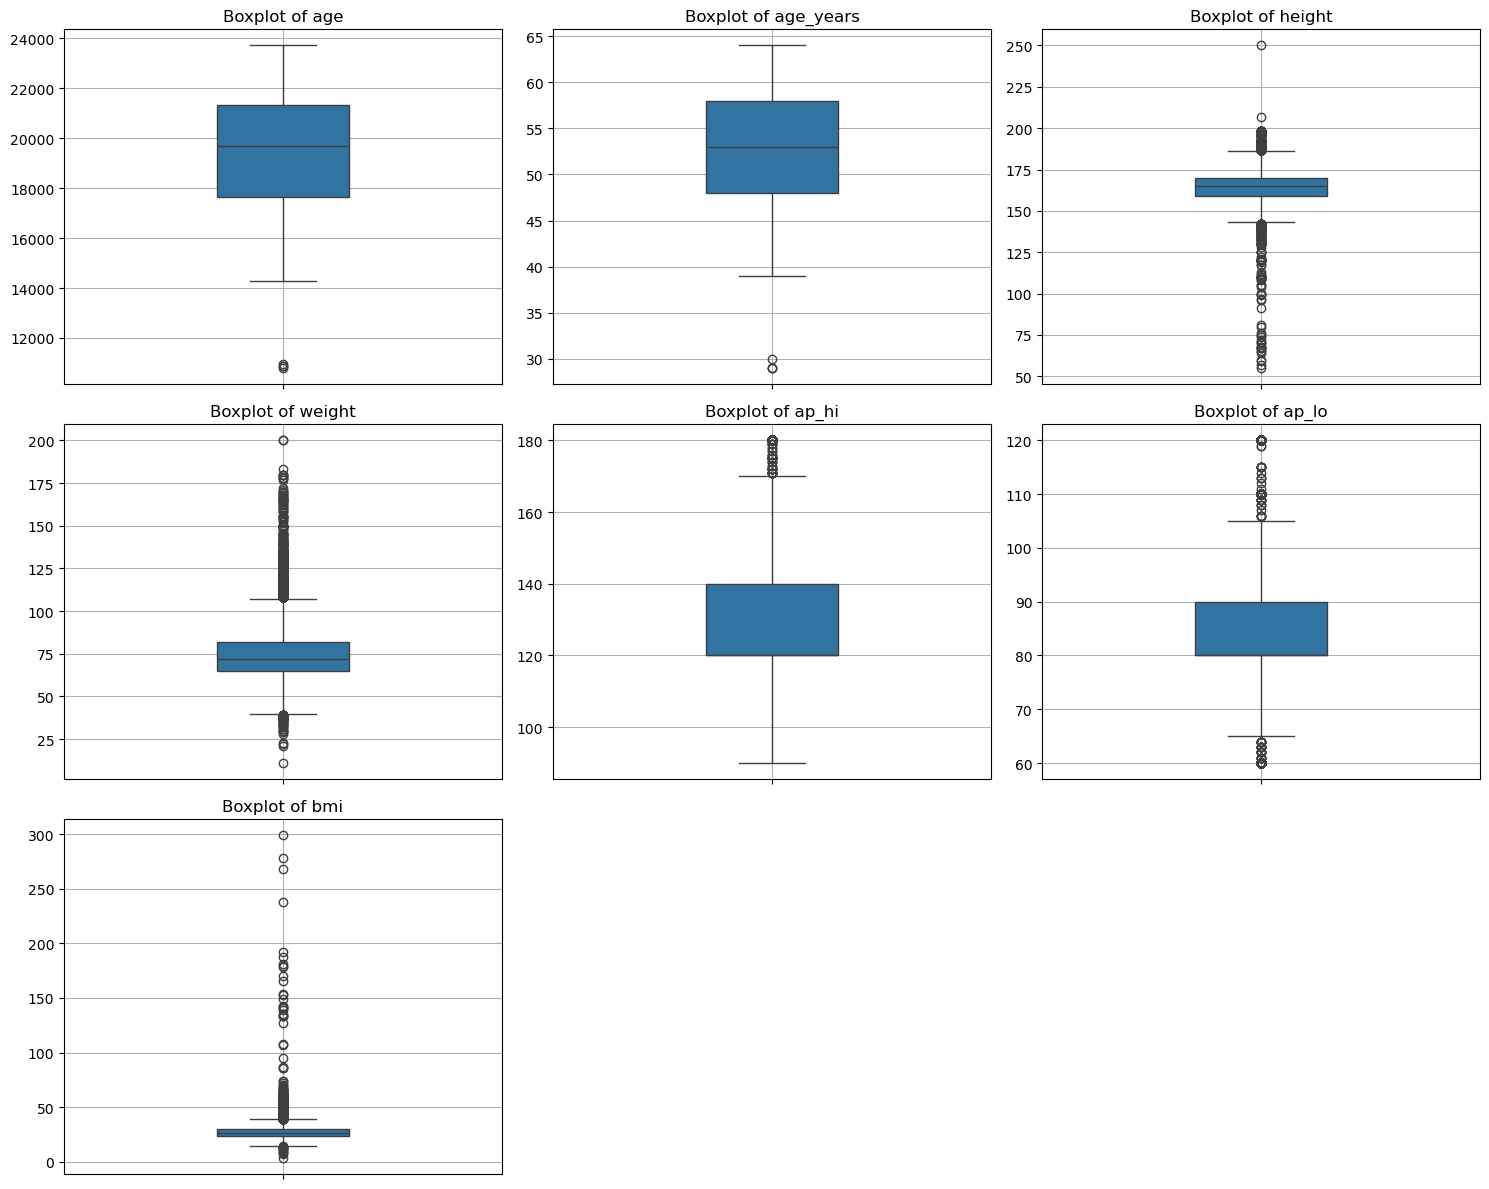

In [10]:
num_cols = ['age', 'age_years', 'height', 'weight', 'ap_hi', 'ap_lo', 'bmi']
plt.figure(figsize=(15,12))

for i, col in enumerate(num_cols):
    plt.subplot(3, 3, i+1)
    sns.boxplot(y=df[col], width=0.3)
    plt.title(f'Boxplot of {col}')
    plt.ylabel('')
    plt.grid(True)

plt.tight_layout()

As mentioned prior, the boxplots above reveal a large number of outliers, such as bmi containing many extreme values well beyond reason. Additionally, variables like height, weight, and blood pressure (ap_hi and ap_lo) show values that are outside expected clinical ranges. We will filter out these outliers based on interquartile ranges.

In [11]:
num_cols = ['age', 'age_years', 'height', 'weight', 'ap_hi', 'ap_lo', 'bmi']

# We will use this to track the number of rows in our data before and after cleaning out outliers
original_rows = df.shape[0]

for col in num_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    low_bound = q1 - (1.5 * iqr)
    upp_bound = q3 + (1.5 * iqr)
    df = df[(df[col] >= low_bound) & (df[col] <= upp_bound)]

cleaned_rows = df.shape[0]
dropped_rows = original_rows - cleaned_rows

print(f"Rows before cleaning: {original_rows}")
print(f"Rows after cleaning: {cleaned_rows}")
print(f"Rows dropped: {dropped_rows}")


Rows before cleaning: 68205
Rows after cleaning: 61329
Rows dropped: 6876


We only had to drop around 1-2% of the data while eliminating nearly all of the outliers. Let's save this cleaned data to a new CSV file so we can use it later during modeling.

In [12]:
df.to_csv('cardio_data_clean.csv', index=False)

# Feature Engineering

To better analyze the relationship between cardio and the other features, we will apply one-hot encoding to the bp_category variable. Using this, we can compute the correlations between variables to identify connections. Let's first visualize these correlations.

In [13]:
df_dummy = pd.get_dummies(df)
corr_matrix = df_dummy.corr()
columns = ['cardio']
card_corr = corr_matrix.loc[:, columns]
card_corr = card_corr.drop(index='cardio')

In [14]:
%run one_hot_encoding.ipynb
df_dummy = bool_to_int(df_dummy)

Text(0.5, 1.0, 'Feature Correlation with Cardio')

<Figure size 2500x1500 with 0 Axes>

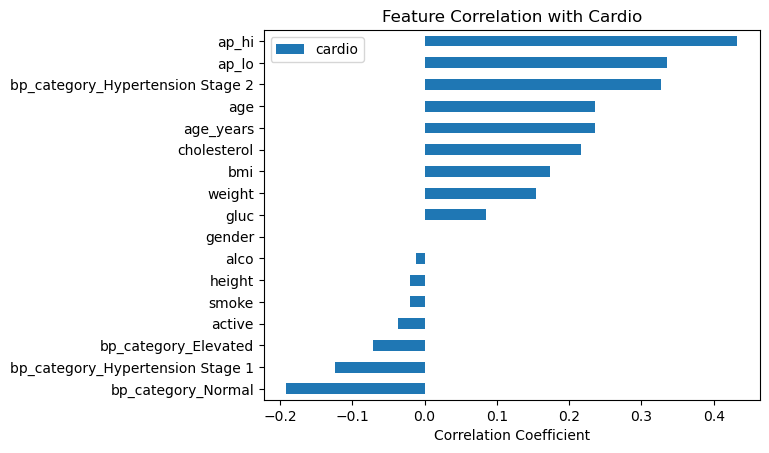

In [15]:
plt.figure(figsize=(10,6), dpi=250)
card_corr.sort_values(by='cardio', ascending=True).plot(kind='barh', legend='False')
plt.xlabel('Correlation Coefficient')
plt.title('Feature Correlation with Cardio')

Based on df.corr(), we can see that patients' systolic (ap_hi) and diastolic (ap_lo) blood pressure are most strongly correlated with the presence of cardiovascular disease. These findings align with expectations, as hypertension is already a well-established risk factor for cardiovascular disease.
However, it's important to consider other strong features, such as age, cholesterol, and lifestyle factors such as physical activity.

Let's create a new variable, age_group, so we can stratify by age later.

In [16]:
def group(age):
    if age < 40:
        return 'Under 40'
    elif age < 50:
        return '40-49'
    elif age < 60:
        return '50-59'
    else:
        return '60+'

df['age_group'] = df['age_years'].apply(group)

# Bivariate Analysis

We see how individual features relate to the target variable. But we should also have an understanding of how features relate to each other. High correlation between input features might affect the performance of certain models later, so let's use a heatmap to show the correlations between all features in the dataset.

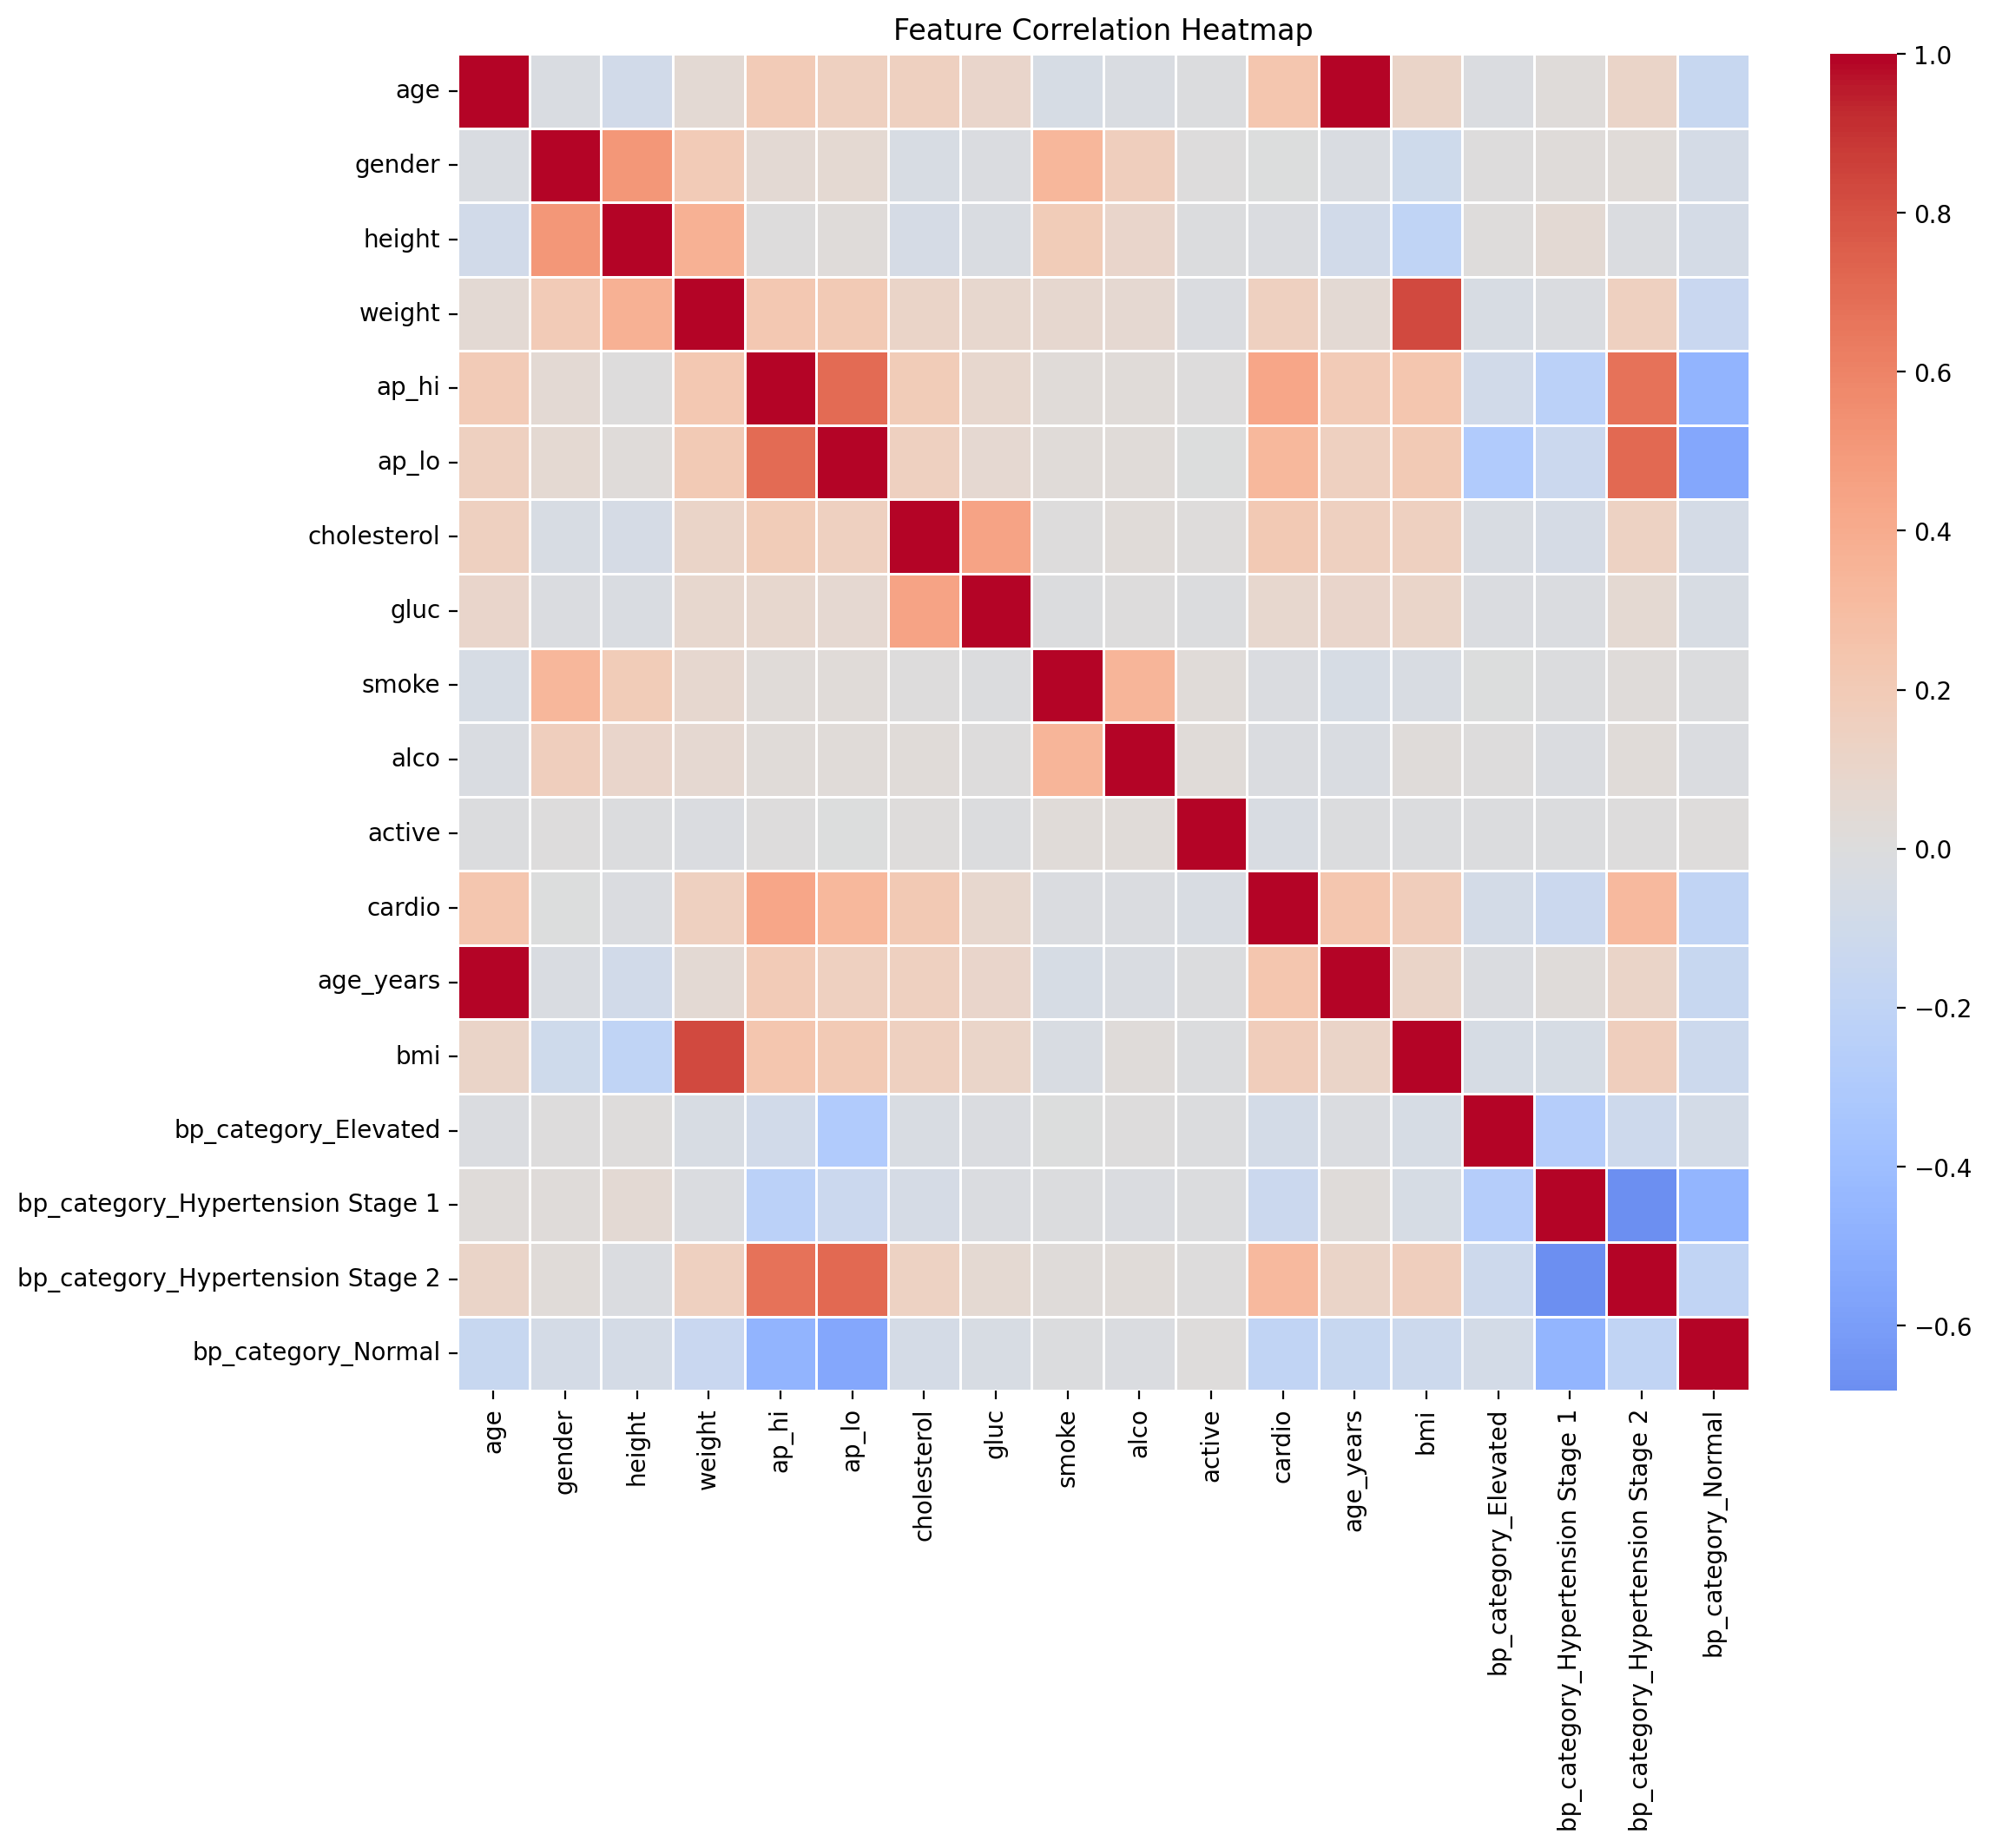

In [38]:
plt.figure(figsize=(12, 10), dpi=200)
sns.heatmap(df_dummy.corr(), cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Feature Correlation Heatmap');

Aside from correlations between variables that represent the same information, such as age and age_years, most variables are only weakly to moderately correlated with each other. Since no other features exceed high thresholds, it's best not drop or combine any features at this stage.

We can visualize some of these interactions between features to gain a better understanding of where risk of cardiovascular disease is elevated. First, let's plot the average rate of cardio being present along each category of blood pressure types using a bar plot.

Text(0, 0.5, 'Average Cardio Rate')

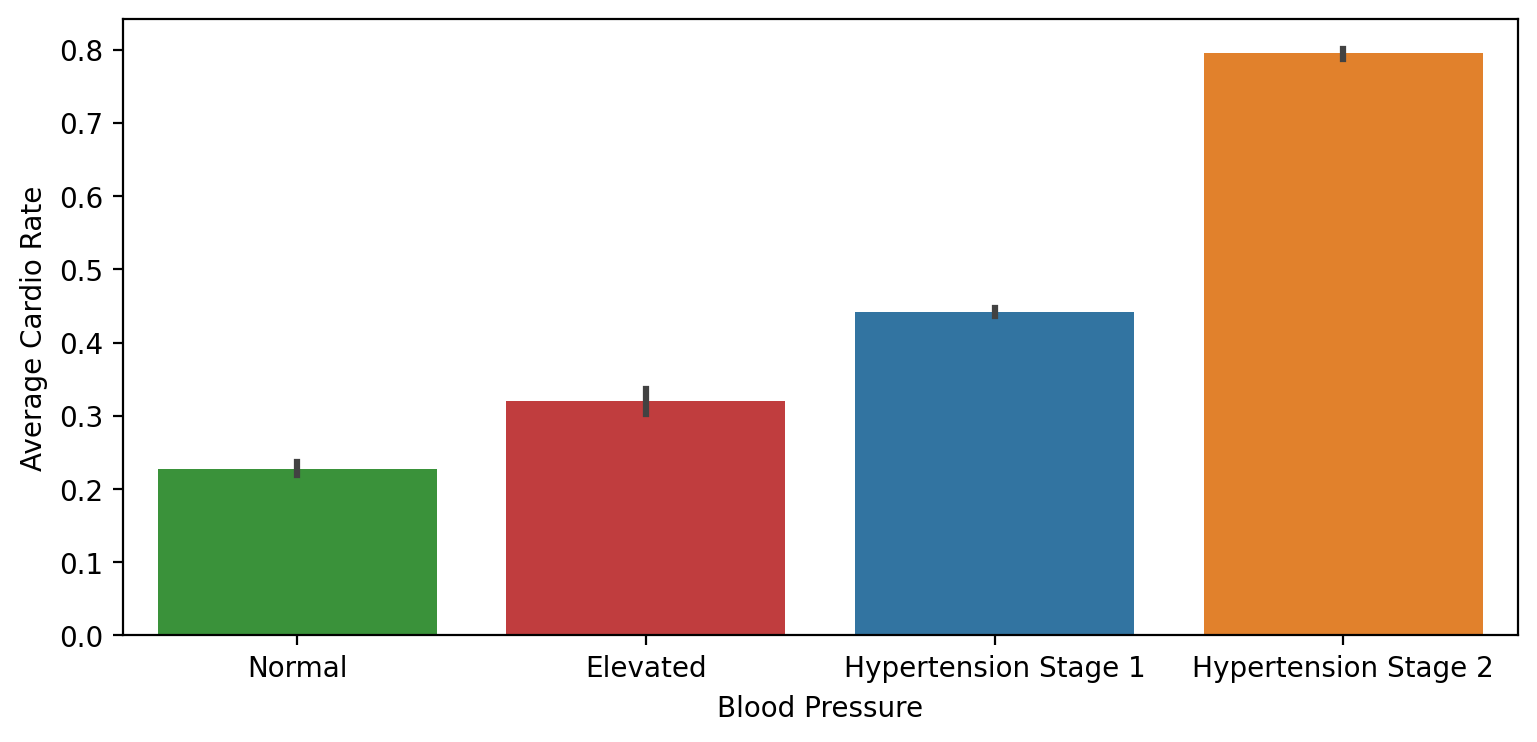

In [39]:
plt.figure(dpi=200, figsize=(9, 4))
order = ['Normal', 'Elevated', 'Hypertension Stage 1', 'Hypertension Stage 2']
sns.barplot(data=df, x='bp_category', y='cardio', hue='bp_category', legend=False, order=order)
plt.xlabel('Blood Pressure')
plt.ylabel('Average Cardio Rate')


In [41]:
df['bp_category'].value_counts()

bp_category
Hypertension Stage 1    37909
Hypertension Stage 2    13684
Normal                   7186
Elevated                 2550
Name: count, dtype: int64

Let's stratify by the feature we created earlier, age_group.

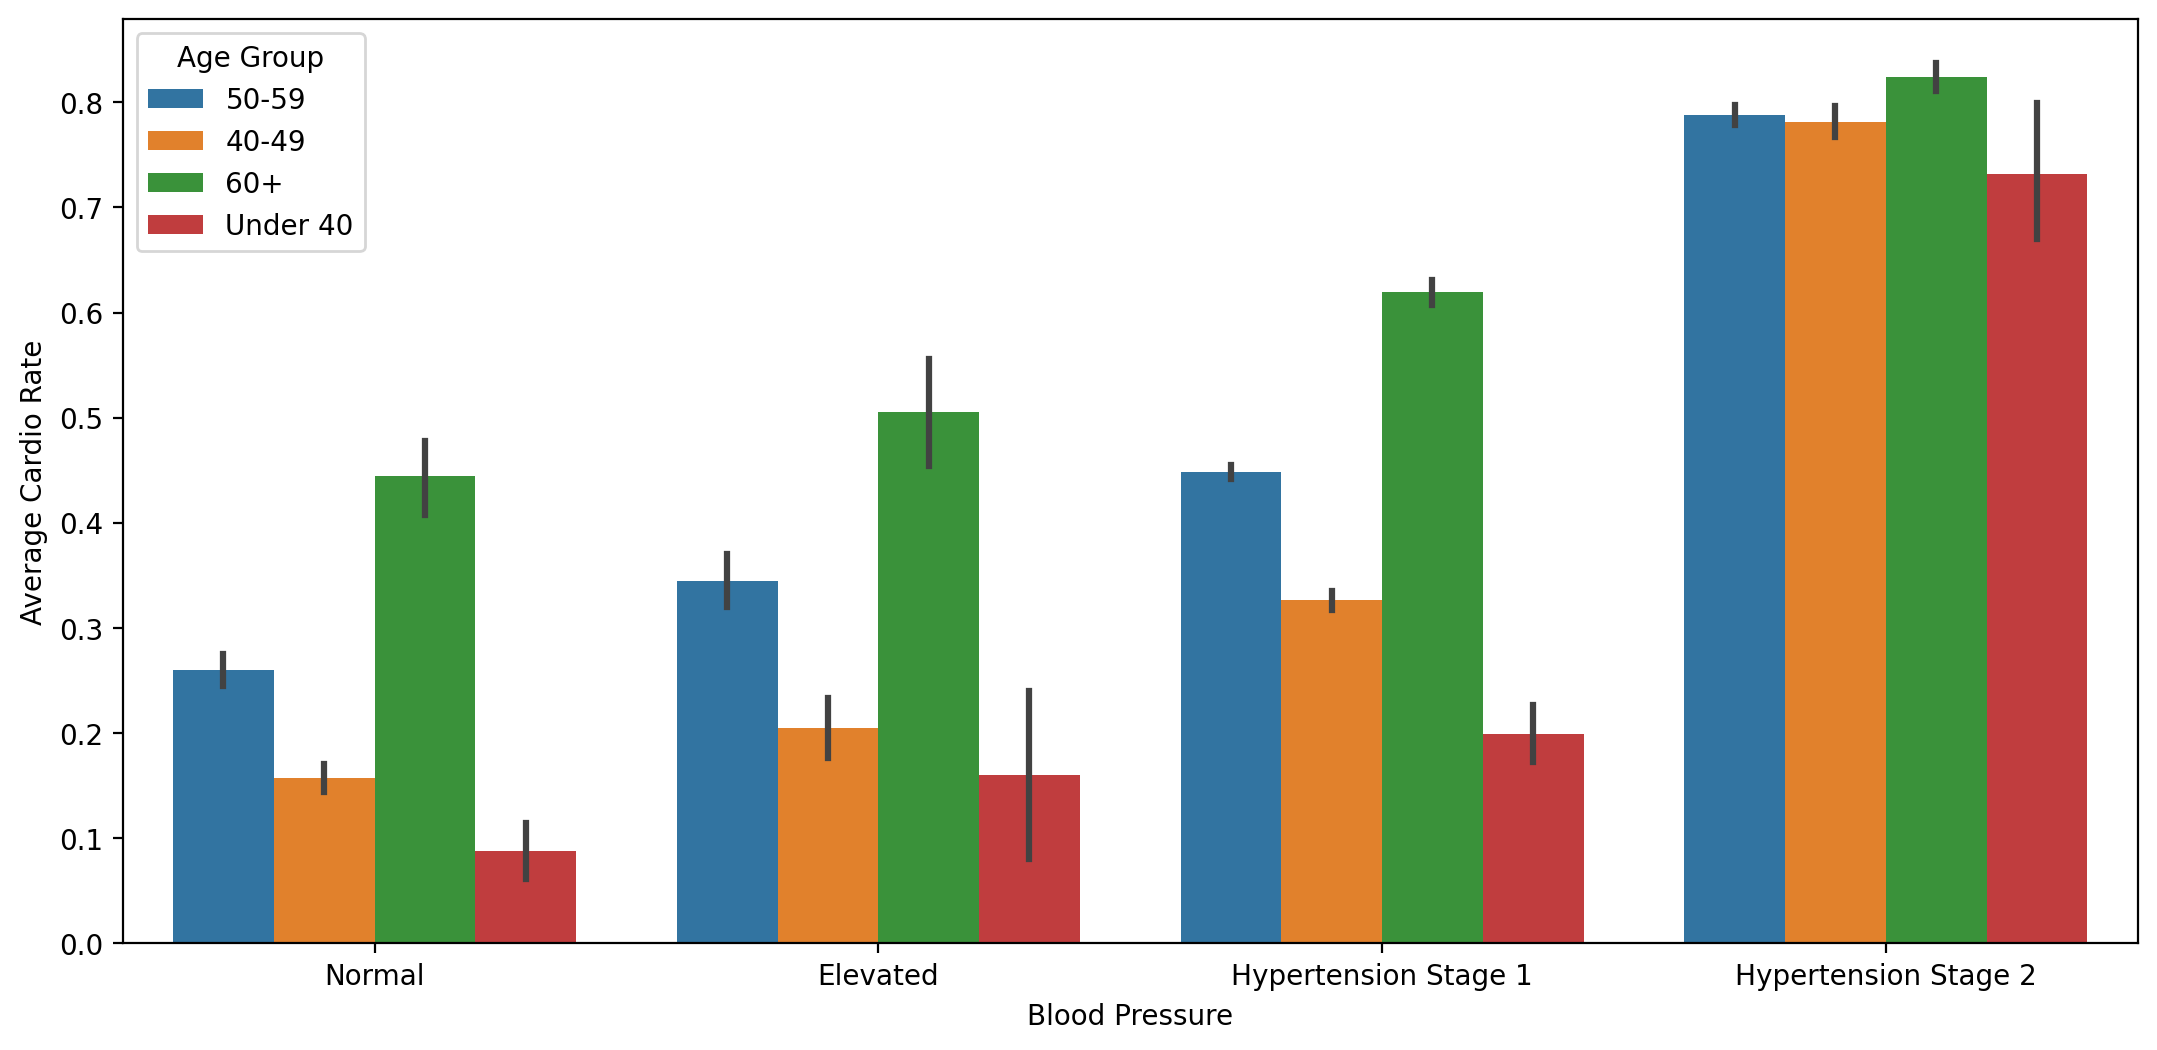

In [43]:
plt.figure(dpi=200, figsize=(13, 6))
order = ['Normal', 'Elevated', 'Hypertension Stage 1', 'Hypertension Stage 2']
sns.barplot(data=df, x='bp_category', y='cardio', hue='age_group', order=order)
plt.xlabel('Blood Pressure')
plt.legend(title='Age Group')
plt.ylabel('Average Cardio Rate');

The 50-59 age group shows the steepest risk gradient, going from around 25% CVD risk at Normal BP to nearly 80% CVD risk at Stage 2 Hypertension. Additionally, individuals aged 60 and above consistently showed a relatively high CVD risk, even at Normal BP.

To better visualize the kind of role it plays in combination with cholesterol, we will take a closer look at age, the next strongest indicator feature of CVD.

<Axes: xlabel='age_group', ylabel='cholesterol'>

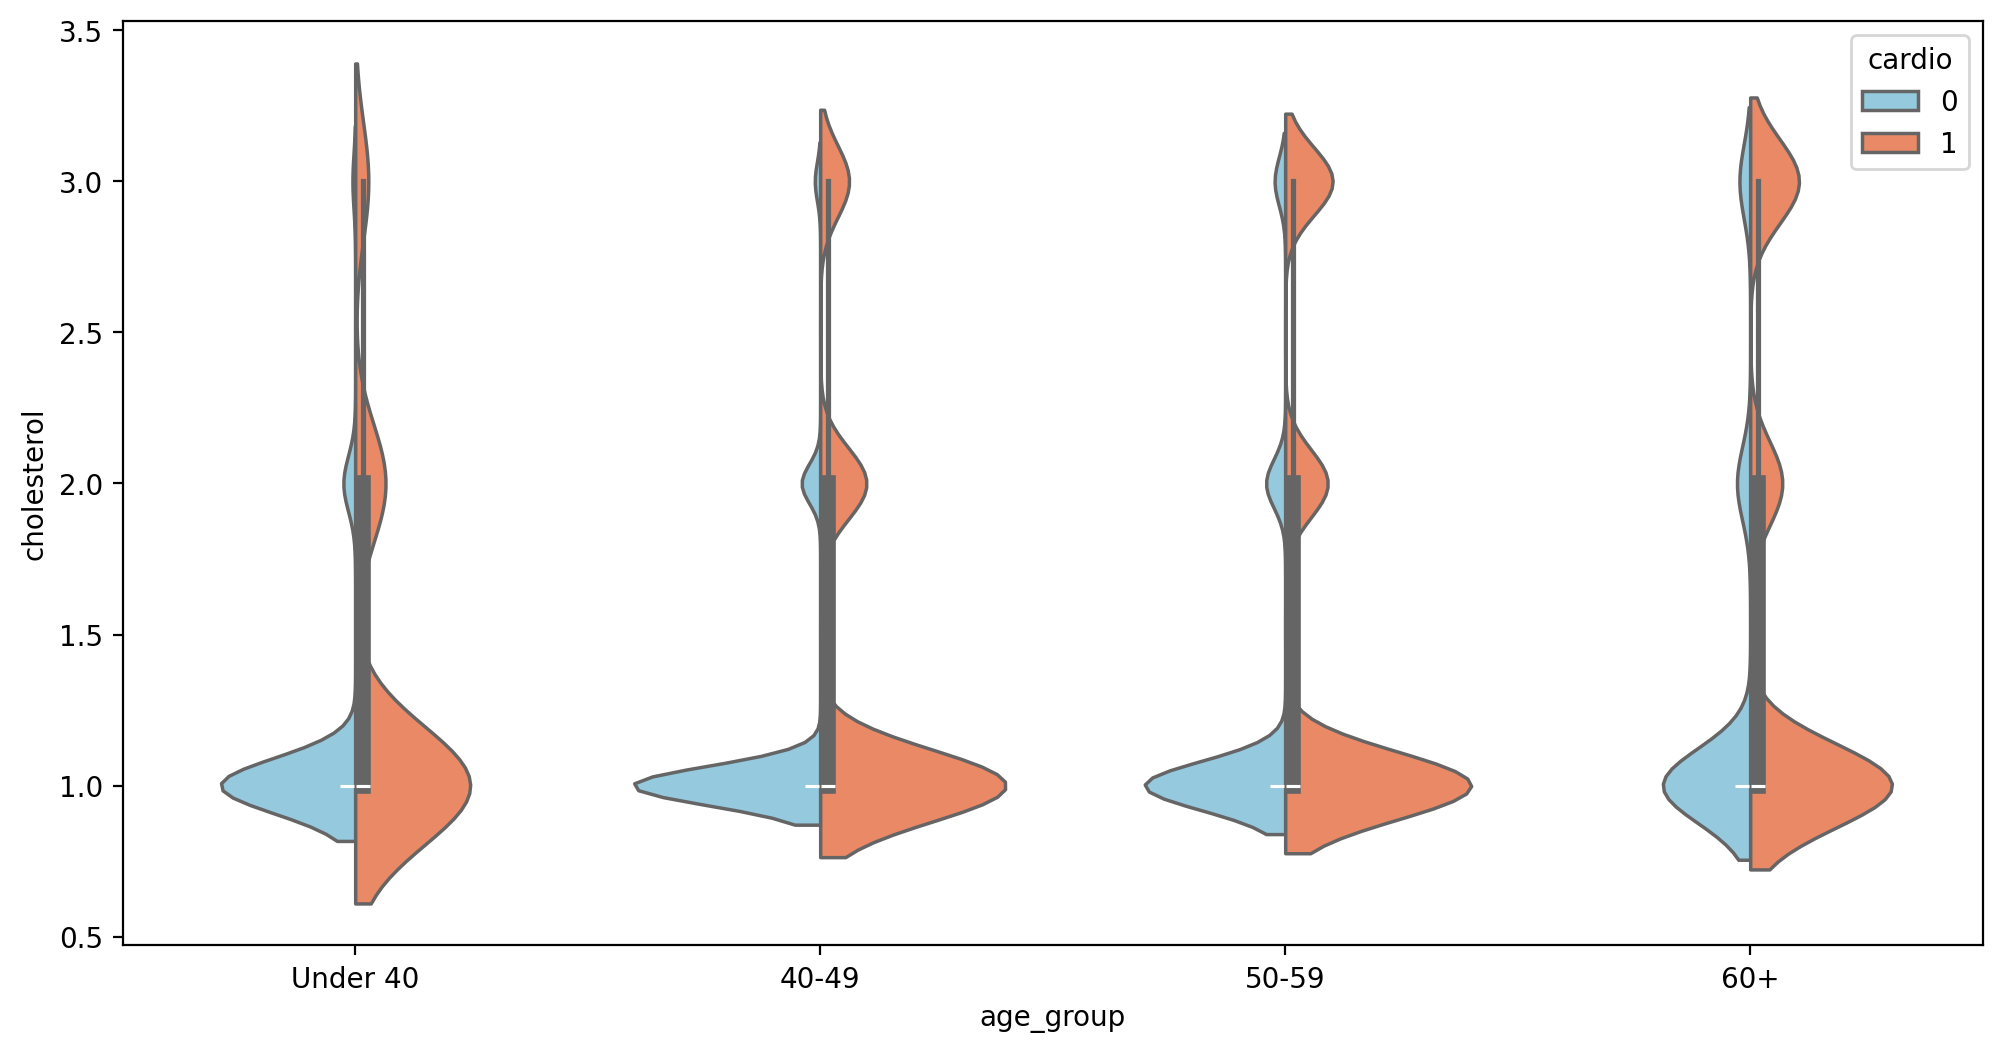

In [45]:
plt.figure(dpi=200, figsize=(12,6))
sns.violinplot(data=df, x='age_group', y='cholesterol', hue='cardio', split=True, palette={0: 'skyblue', 1: 'coral'}, order=['Under 40', '40-49', '50-59', '60+'])

In [46]:
df['cholesterol'].value_counts()

cholesterol
1    45865
2     7813
3     6607
Name: count, dtype: int64

In [47]:
df['cardio'].value_counts()

cardio
0    30893
1    29392
Name: count, dtype: int64

This aligns with our distribution of patient cholesterol data. There is almost 7x more patients with normal (1) cholesterol compared to patients with well above normal (3) cholesterol. 

A majority of patients with a cholesterol level of 3.0 were shown to have presence of CVD, with patients aged 50 or under with a cholesterol level of 3.0 nearly possessing CVD. Despite the distribution of CVD across the dataset being nearly equal, a majority of patients with cholesterol levels greater than 1.0 have a greater risk of CVD, further showing how cholesterol and age together increase the risk of CVD. 


#### We'll conclude this section with a list of findings:

- Extreme outliers were present in height, weight, (consequently bmi), and blood pressure, so around 1.5% of entries were removed to improve the quality of the dataset.
- Blood pressure, both systolic (ap_hi) and diastolic (ap_lo) shows the strongest correlation with the presence of cardiovascular disease.
- Patients with Hypertension Stage 2 blood pressure had close to an average 80% likelihood of cardiovascular disease.
- Across all groups within blood pressure category, patients aged 60 or older showed the greatest likelihood of cardiovascular disease.

We will move on to building predictive models and tuning hyperparameters to more closely reflect these relationships observed. We will be running and comparing the performance of __four classifier models: Logistic Regression, Support Vector Classifiers (SVC), Random Forest, and Boosted Trees.__